In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/GiaChungCu_HCM_June2021_laydulieu_com.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GIỐNG - LOẠI        1950 non-null   object 
 1   GIỐNG - NHU CẦU     1950 non-null   object 
 2   GIỐNG - TỈNH THÀNH  1950 non-null   object 
 3   QUẬN HUYỆN          1950 non-null   object 
 4   GIÁ - TRIỆU ĐỒNG    1950 non-null   float64
 5   DIỆN TÍCH - M2      1948 non-null   float64
 6   HƯỚNG               658 non-null    object 
 7   SỐ TẦNG             0 non-null      float64
 8   SỐ PHÒNG            1945 non-null   float64
 9   SỐ TOILETS          1895 non-null   float64
 10  GIẤY TỜ PHÁP LÝ     1462 non-null   object 
dtypes: float64(5), object(6)
memory usage: 167.7+ KB


array([[<Axes: title={'center': 'GIÁ - TRIỆU ĐỒNG'}>,
        <Axes: title={'center': 'DIỆN TÍCH - M2'}>],
       [<Axes: title={'center': 'SỐ TẦNG'}>,
        <Axes: title={'center': 'SỐ PHÒNG'}>],
       [<Axes: title={'center': 'SỐ TOILETS'}>, <Axes: >]], dtype=object)

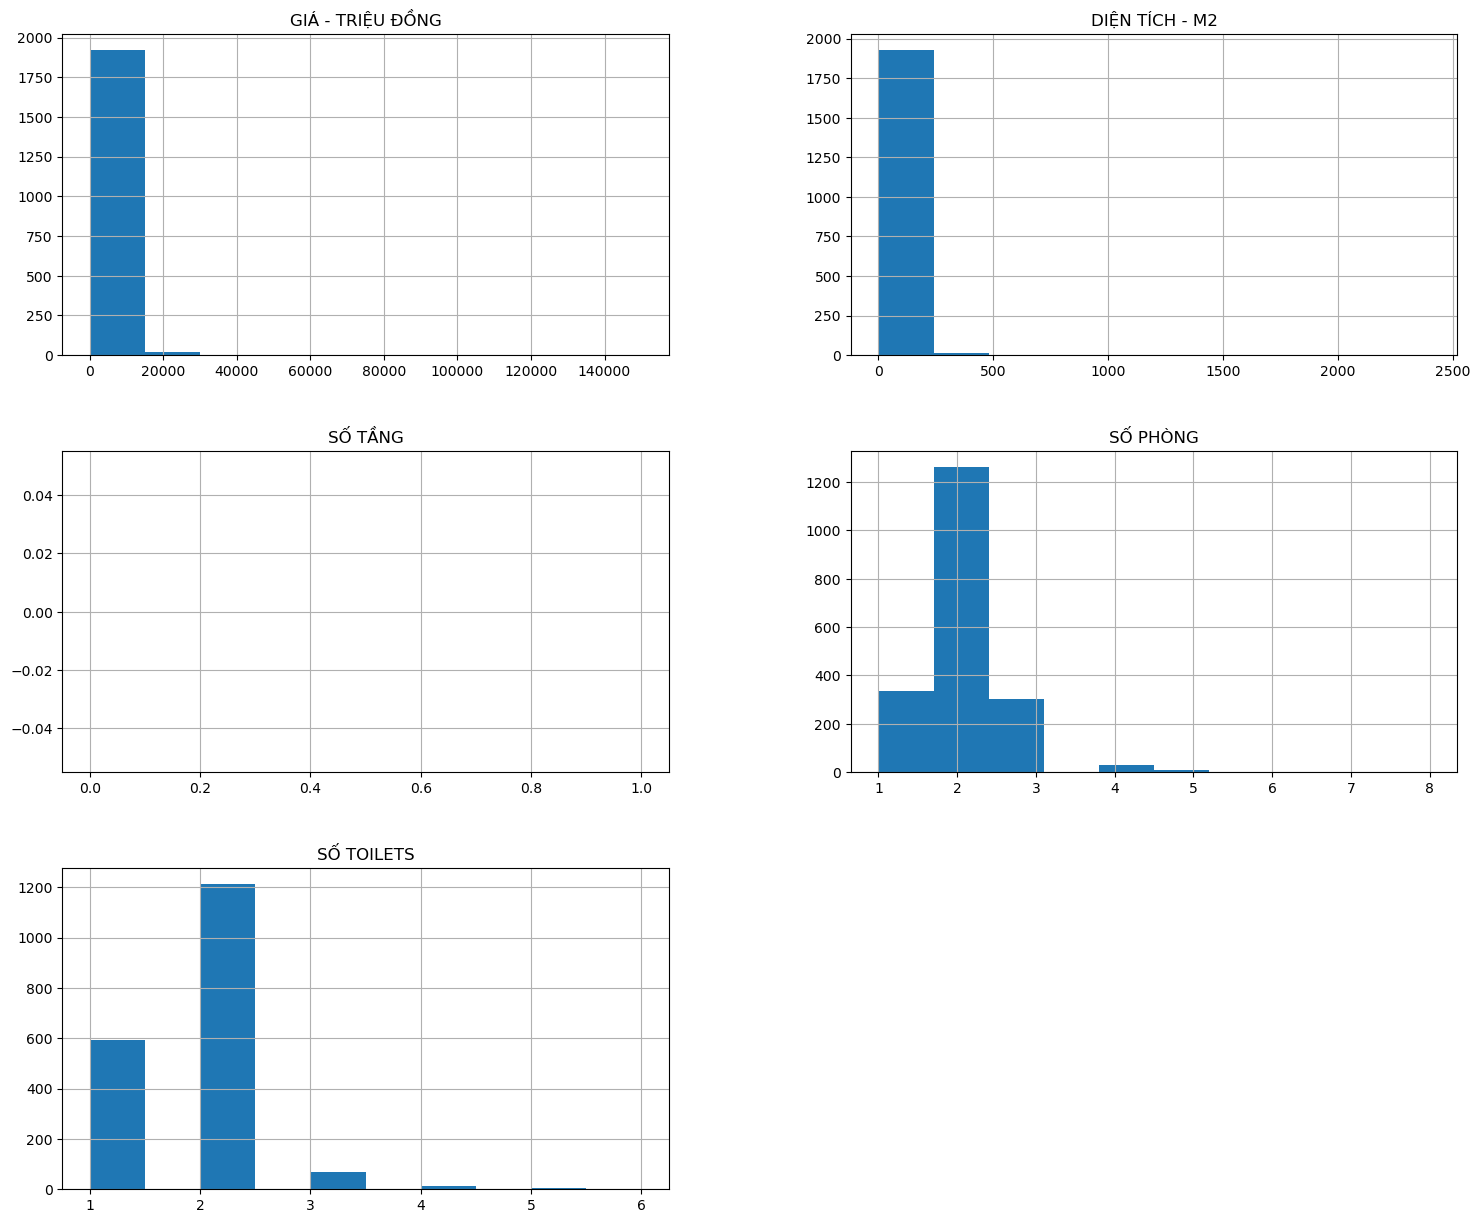

In [4]:
#Khám phá dữ liệu
data.hist(figsize=(18,15))

In [5]:
#Xử lý dữ liệu

In [6]:
data.drop(columns = ["GIỐNG - LOẠI", "GIỐNG - NHU CẦU", "GIỐNG - TỈNH THÀNH","HƯỚNG","QUẬN HUYỆN","GIẤY TỜ PHÁP LÝ", "SỐ TẦNG"], inplace=True) 

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 0 to 1949
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GIÁ - TRIỆU ĐỒNG  1893 non-null   float64
 1   DIỆN TÍCH - M2    1893 non-null   float64
 2   SỐ PHÒNG          1893 non-null   float64
 3   SỐ TOILETS        1893 non-null   float64
dtypes: float64(4)
memory usage: 73.9 KB


In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('GIÁ - TRIỆU ĐỒNG', axis=1)
y = data['GIÁ - TRIỆU ĐỒNG']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
X_test

,DIỆN TÍCH - M2,SỐ PHÒNG,SỐ TOILETS
1088,66.0,2.0,2.0
629,74.0,2.0,2.0
988,56.0,2.0,1.0
1354,49.0,1.0,1.0
603,72.0,2.0,2.0
...,...,...,...
637,49.0,1.0,1.0
143,66.0,2.0,2.0
1166,88.0,3.0,2.0
696,66.0,2.0,1.0


In [20]:
train_data = X.join(y)

<Axes: >

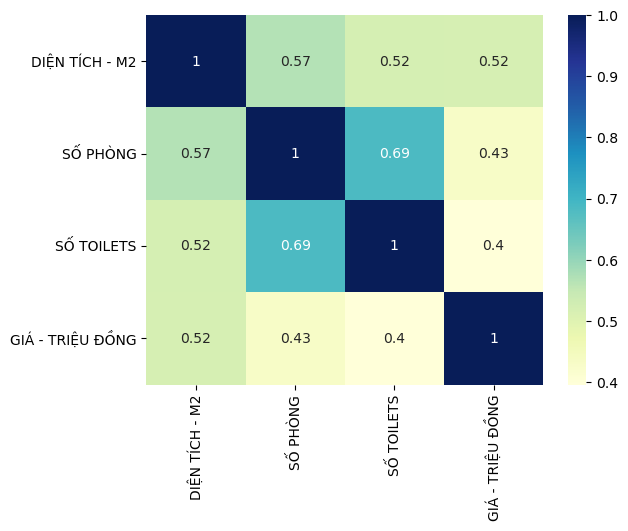

In [21]:
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
#Feature càng tiến đến 1 thì càng ảnh hưởng đến giá nhà

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100,random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
forest.score(X_test, y_test)

0.25433280854708695